In [1]:
from matplotlib import pyplot as plt
from tofpipe.connection.conn_zmq import Client
from tofpipe.protocol import protobuf, message
import time

In [2]:

protocol = protobuf.Protocol()


def get_phase_from_raspi():
    client = Client(protocol=protocol)
    client.connect(host="192.168.1.13", port=5000)
    max_tries = 10
    for i in range(max_tries):
    # set exposure to a reasonable value
        req = protocol.request()
        req.exposure = 80

        client.send(req)

        def get_frame():
            response = client.recv()
            which = response.response_type

            if which == message.ResponseType.FRAMEDATA:
                return response.frame

        frame = get_frame()
        if frame[0] == message.FrameType.PHASE:
            print("temperature of initial frame", frame[2][0])
            return frame[1]
    client.close()

In [37]:
client.close()

Client Connected
temperature of initial frame 37.82757568359375


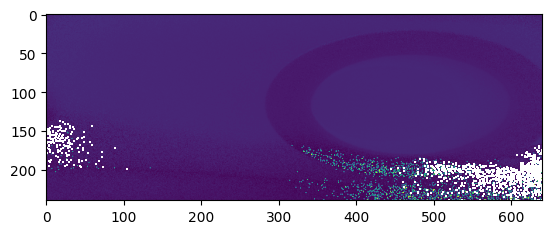

In [5]:
plt.imshow(get_phase_from_raspi())

temperature of initial frame 39.463226318359375


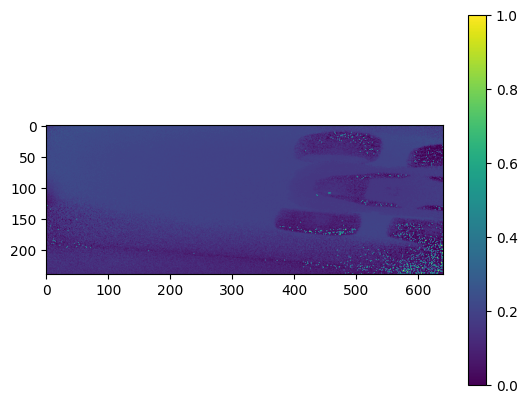

temperature of initial frame 39.57413101196289


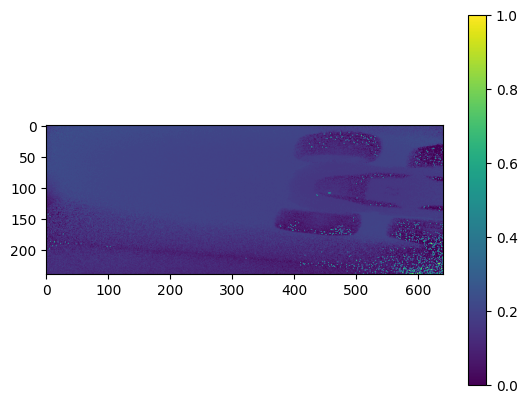

temperature of initial frame 39.544822692871094


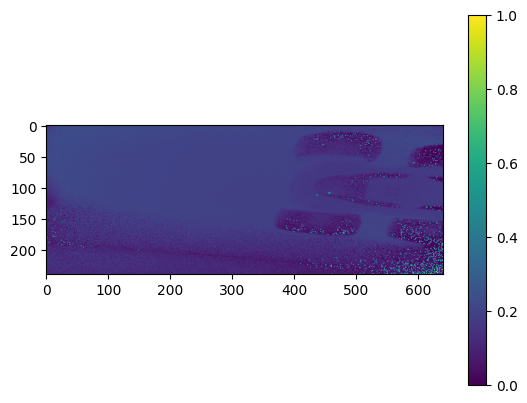

temperature of initial frame 39.49421310424805


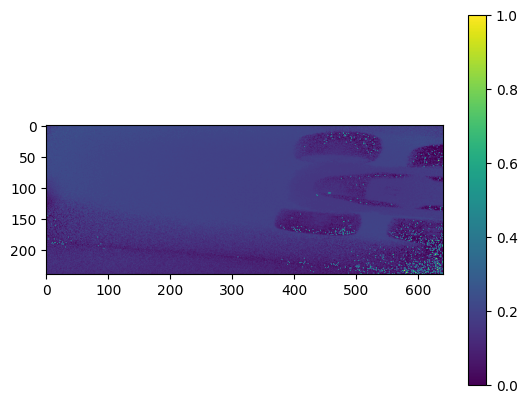

temperature of initial frame 39.52033615112305


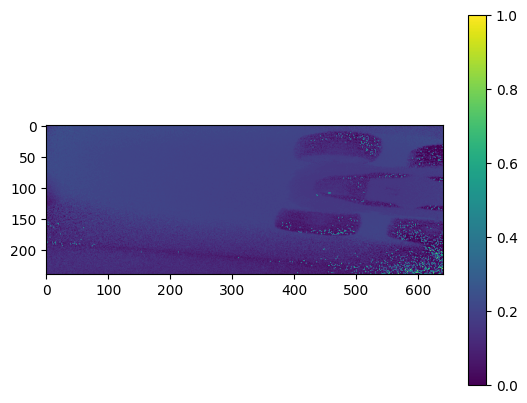

temperature of initial frame 39.51871871948242


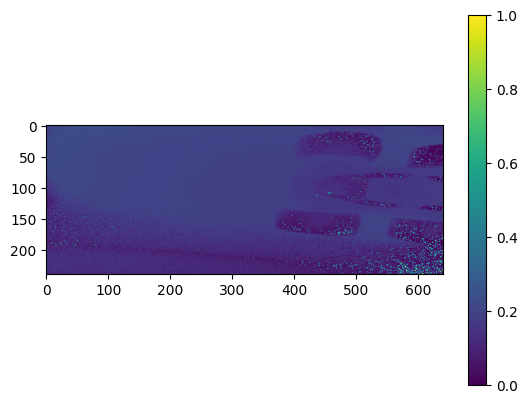

temperature of initial frame 39.46968078613281


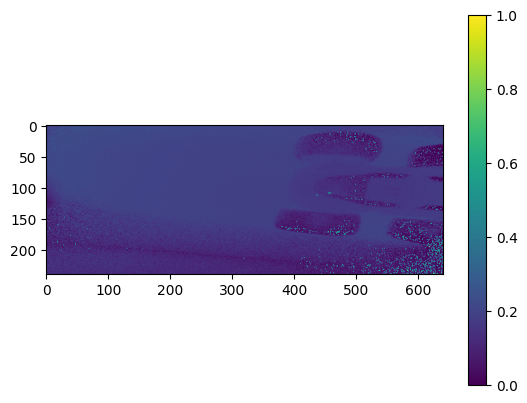

temperature of initial frame 39.34611892700195


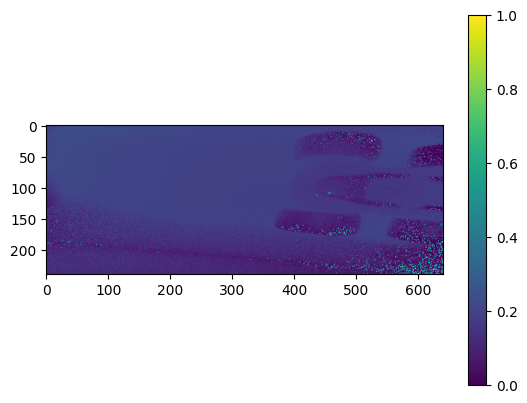

temperature of initial frame 39.53997802734375


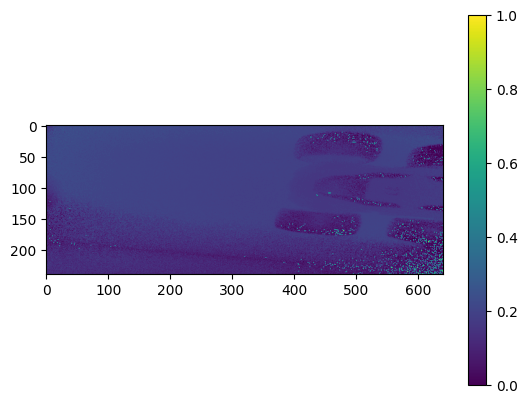

temperature of initial frame 39.499053955078125


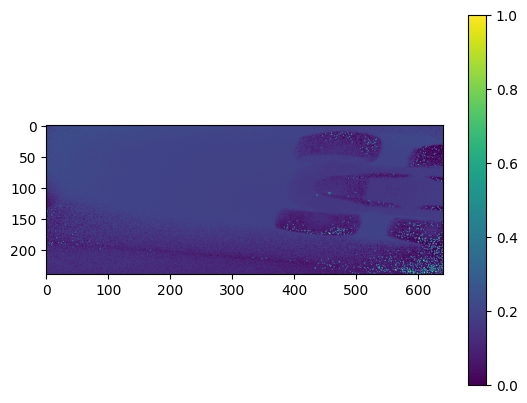

In [20]:
import numpy as np
from scipy.ndimage import gaussian_filter
import tofpipe

image_total = 10
for i in range(image_total):
    image = get_phase_from_raspi()
    image = np.nan_to_num(image)
    image = np.clip(image, 0, 1)
    plt.imshow(image)
    plt.colorbar()
    plt.show()

In [7]:
phase2

array([[0.17596343, 0.14535661, 0.13430831, ..., 0.16085362, 0.23096418,
        0.20334183],
       [0.17430313, 0.1438835 , 0.15716058, ..., 0.14768901, 0.14768901,
        0.20118648],
       [0.10823828, 0.17940268, 0.20298259, ..., 0.16466978, 0.2241292 ,
        0.2162336 ],
       ...,
       [0.1074725 , 0.12763794, 0.11742759, ..., 1.8585216 , 0.00316419,
        0.02740394],
       [0.1235538 , 0.15322135, 0.13234417, ..., 1.8039515 , 0.04283201,
        0.02292376],
       [0.11538552, 0.10508327, 0.08087996, ..., 0.        , 0.12253276,
        0.0691744 ]], dtype=float32)